In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 17s 1us/step


In [6]:
train_images = x_train.reshape(60000, 784)
test_images = x_test.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [8]:
train_labels = keras.utils.to_categorical(y_train, 10)
test_labels = keras.utils.to_categorical(y_test, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


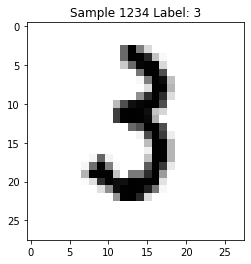

In [17]:
import matplotlib.pyplot as plt


def display_sample(num):
    # print the one-hot array of this sample's label
    print(train_labels[num])
    # print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    # reshape the 748 values to 28x28 ijmages
    image =  train_images[num].reshape([28, 28])
    plt.title('Sample %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

In [19]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 2s - loss: 0.2434 - accuracy: 0.9295 - val_loss: 0.1114 - val_accuracy: 0.9662 - 2s/epoch - 4ms/step
Epoch 2/10
600/600 - 2s - loss: 0.0971 - accuracy: 0.9712 - val_loss: 0.0808 - val_accuracy: 0.9763 - 2s/epoch - 3ms/step
Epoch 3/10
600/600 - 2s - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0748 - val_accuracy: 0.9769 - 2s/epoch - 3ms/step
Epoch 4/10
600/600 - 2s - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0703 - val_accuracy: 0.9793 - 2s/epoch - 3ms/step
Epoch 5/10
600/600 - 2s - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0681 - val_accuracy: 0.9809 - 2s/epoch - 3ms/step
Epoch 6/10
600/600 - 2s - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0651 - val_accuracy: 0.9797 - 2s/epoch - 3ms/step
Epoch 7/10
600/600 - 2s - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0670 - val_accuracy: 0.9813 - 2s/epoch - 3ms/step
Epoch 8/10
600/600 - 2s - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0687 - val_accuracy: 0.9802 - 2s/epoch - 3ms/step
Epoch 9/10
600/600 - 2s 

In [23]:
history

In [24]:
history.history

{'loss': [0.24344311654567719,
  0.09714210778474808,
  0.06447722762823105,
  0.046842023730278015,
  0.03523243963718414,
  0.02624204009771347,
  0.020708929747343063,
  0.016326062381267548,
  0.012699597515165806,
  0.009438042528927326],
 'accuracy': [0.9295166730880737,
  0.9712166786193848,
  0.980733335018158,
  0.9858333468437195,
  0.9893333315849304,
  0.9921666383743286,
  0.9937833547592163,
  0.9954166412353516,
  0.996233344078064,
  0.9973000288009644],
 'val_loss': [0.11136128008365631,
  0.0808202400803566,
  0.07482007145881653,
  0.07034945487976074,
  0.06808508932590485,
  0.06514103710651398,
  0.0670301616191864,
  0.06866993755102158,
  0.06835613399744034,
  0.07517790794372559],
 'val_accuracy': [0.9661999940872192,
  0.9763000011444092,
  0.9768999814987183,
  0.9793000221252441,
  0.98089998960495,
  0.9797000288963318,
  0.9812999963760376,
  0.9801999926567078,
  0.9821000099182129,
  0.9807000160217285]}

In [25]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test acc:', score[1])

Test loss: 0.0751778706908226
Test acc: 0.9807000160217285


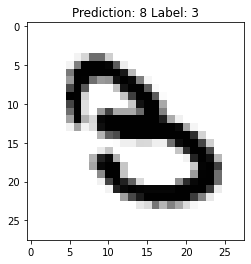

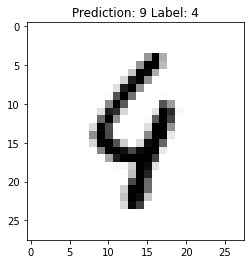

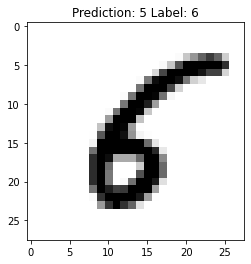

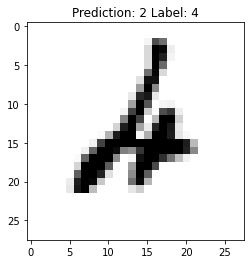

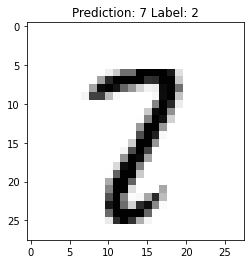

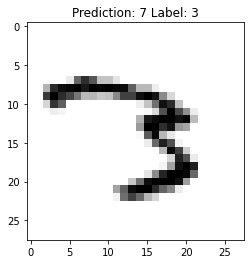

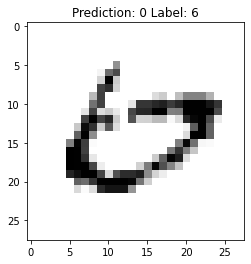

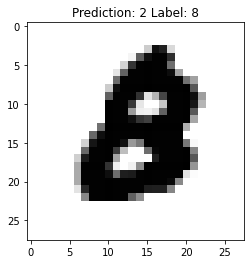

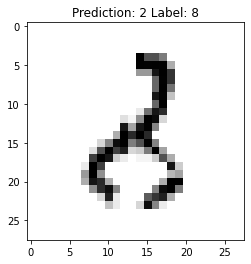

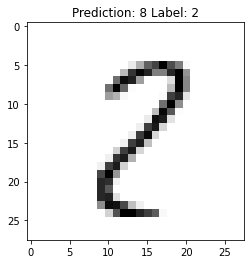

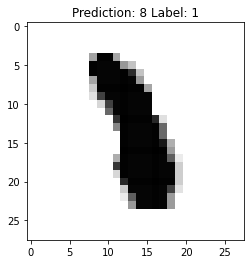

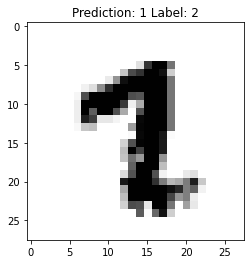

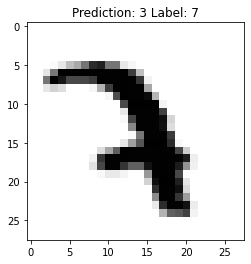

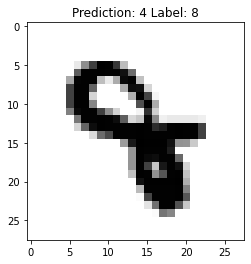

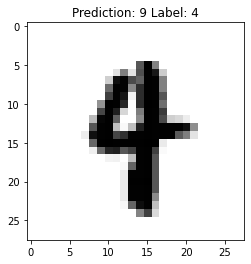

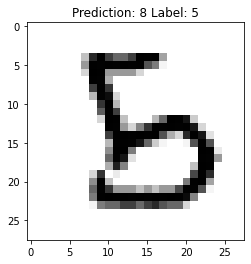

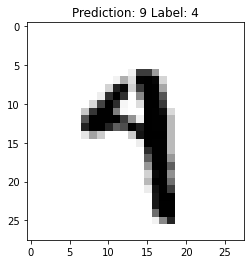

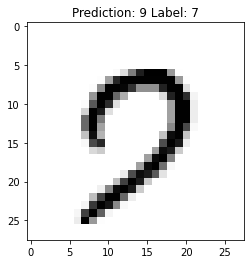

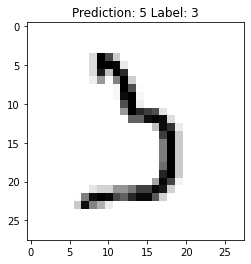

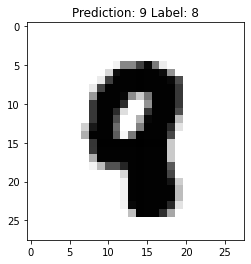

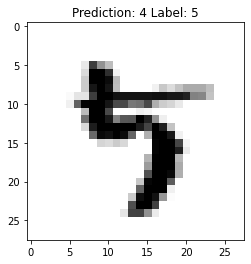

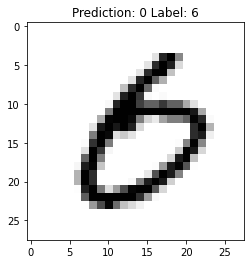

In [29]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1, 784)
    predicted_cat =  model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

## Add Dropout prevent overfitting

In [50]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0015),
              metrics=['accuracy'])

In [53]:
history = model.fit(train_images, train_labels,
                    batch_size=1000,
                    epochs=15, 
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/15
60/60 - 1s - loss: 0.5492 - accuracy: 0.8293 - val_loss: 0.1734 - val_accuracy: 0.9455 - 1s/epoch - 18ms/step
Epoch 2/15
60/60 - 1s - loss: 0.2027 - accuracy: 0.9392 - val_loss: 0.1198 - val_accuracy: 0.9640 - 794ms/epoch - 13ms/step
Epoch 3/15
60/60 - 1s - loss: 0.1504 - accuracy: 0.9544 - val_loss: 0.0960 - val_accuracy: 0.9691 - 797ms/epoch - 13ms/step
Epoch 4/15
60/60 - 1s - loss: 0.1227 - accuracy: 0.9627 - val_loss: 0.0827 - val_accuracy: 0.9736 - 788ms/epoch - 13ms/step
Epoch 5/15
60/60 - 1s - loss: 0.1060 - accuracy: 0.9678 - val_loss: 0.0748 - val_accuracy: 0.9759 - 796ms/epoch - 13ms/step
Epoch 6/15
60/60 - 1s - loss: 0.0910 - accuracy: 0.9721 - val_loss: 0.0664 - val_accuracy: 0.9795 - 795ms/epoch - 13ms/step
Epoch 7/15
60/60 - 1s - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.0628 - val_accuracy: 0.9802 - 799ms/epoch - 13ms/step
Epoch 8/15
60/60 - 1s - loss: 0.0726 - accuracy: 0.9772 - val_loss: 0.0648 - val_accuracy: 0.9792 - 800ms/epoch - 13ms/step
Epoch 9/15


In [54]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test acc:', score[1])

Test loss: 0.05761929228901863
Test acc: 0.9829999804496765


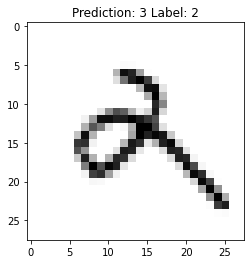

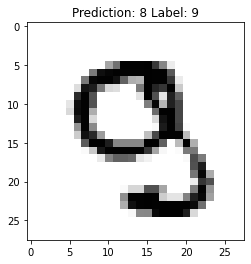

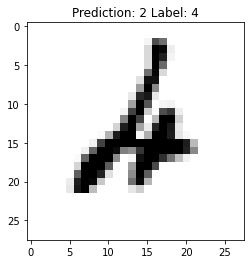

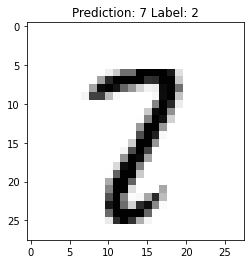

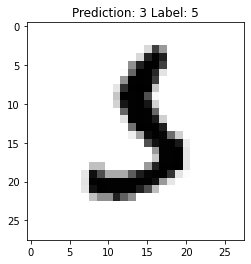

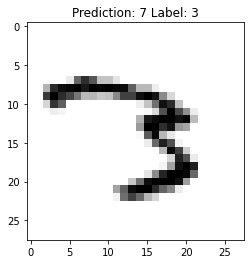

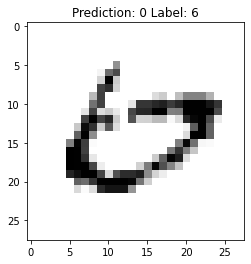

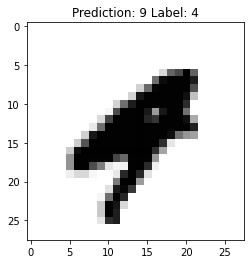

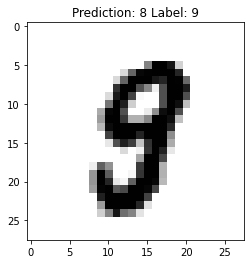

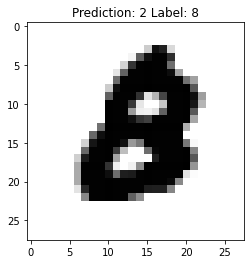

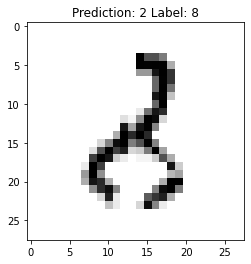

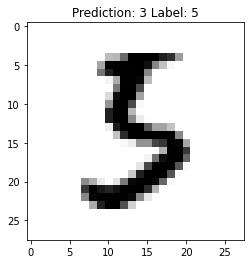

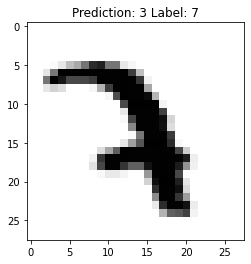

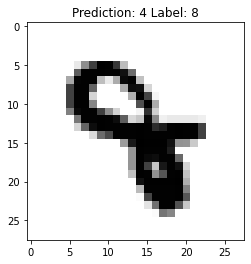

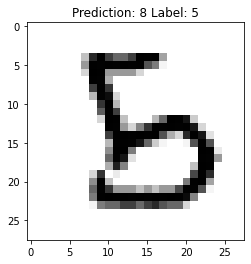

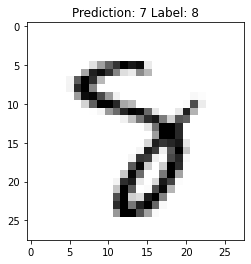

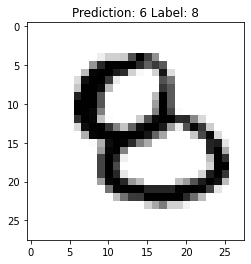

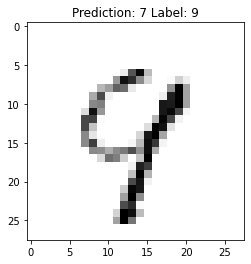

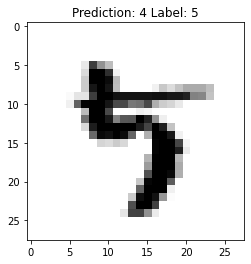

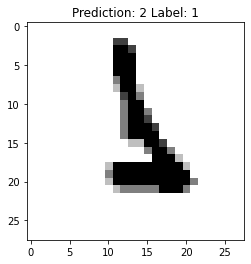

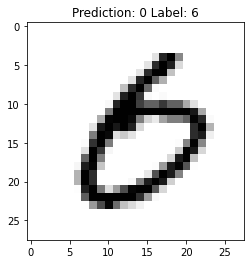

In [55]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1, 784)
    predicted_cat =  model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
        plt.show()